# Feature Importance Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

## LightGBM Model

In [2]:
MODEL_NUMBER = 'M057'
fi_files = [x for x in os.listdir('../../fi/') if MODEL_NUMBER in x]
print(fi_files)
if len(fi_files) == 1:
    f = fi_files[0]
    fi_df = pd.read_csv(f'../../fi/{f}')

['fi_M057_1002_1101_0.9498.csv']


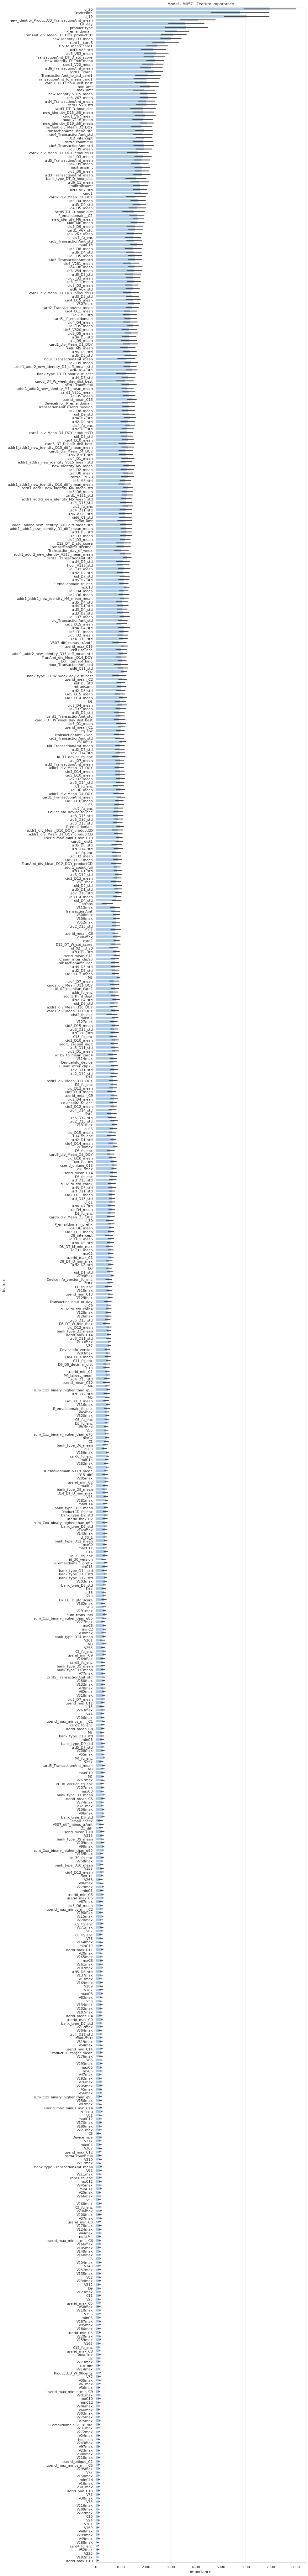

In [3]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
plt.figure(figsize=(12, 150))
ax = sns.barplot(x='importance',
            y='feature',
            data=fi_df.sort_values('importance', ascending=False),
            color="b")
ax.set_title(f'Model - {MODEL_NUMBER} - Feature Importance')

plt.show()

In [4]:
low_importance = fi_df.groupby('feature')[['importance']].max().sort_values('importance').query('importance <= 100').index

In [5]:
[l for l in low_importance]

[]

In [6]:
high_importance =  fi_df.groupby('feature')[['importance']].max().sort_values('importance').query('importance >= 500').index

In [8]:
# [x for x in high_importance]

# Look at top features

In [9]:
tr = pd.read_parquet('../../data/train_FE015.parquet')
te = pd.read_parquet('../../data/test_FE015.parquet')

In [10]:
tt = pd.concat([tr, te], axis=0)

In [11]:
tt.shape

(1097231, 1955)

In [12]:
tr.shape

(590540, 1955)

In [28]:
top5_feats = fi_df.groupby('feature')[['importance']].max().sort_values('importance', ascending=False).index[:5].tolist()

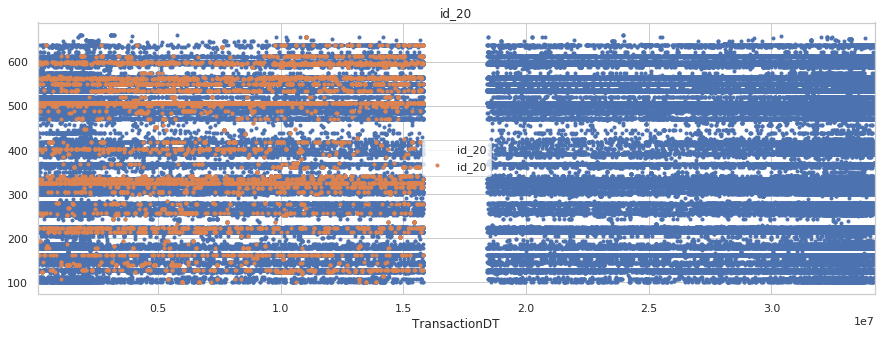

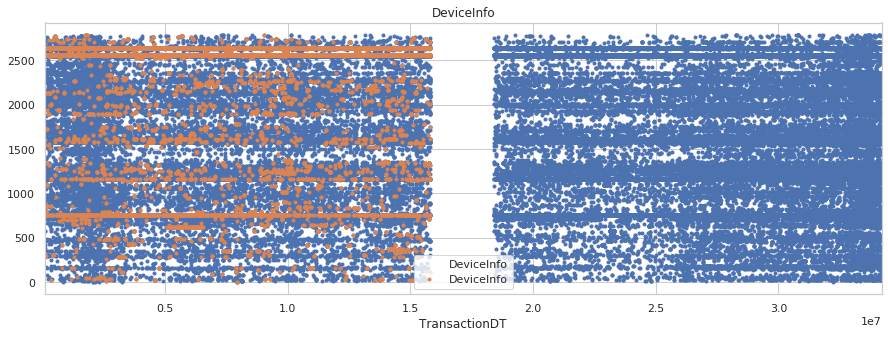

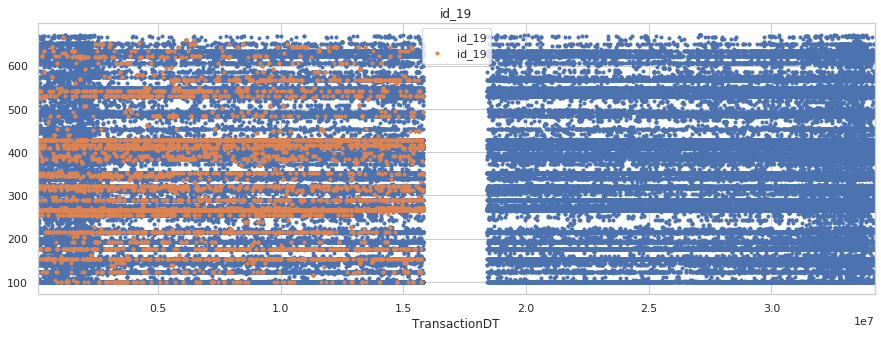

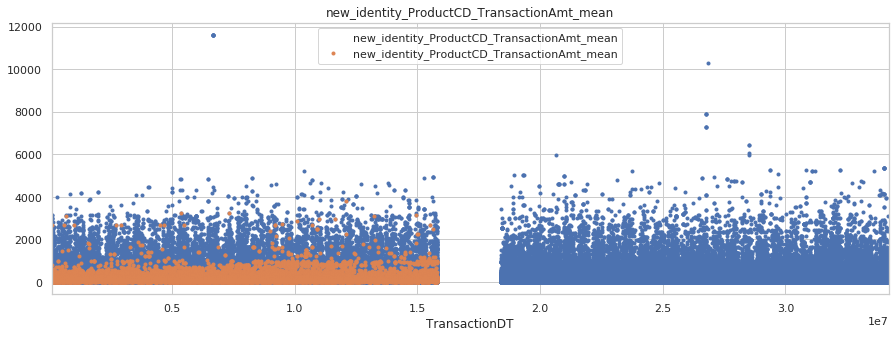

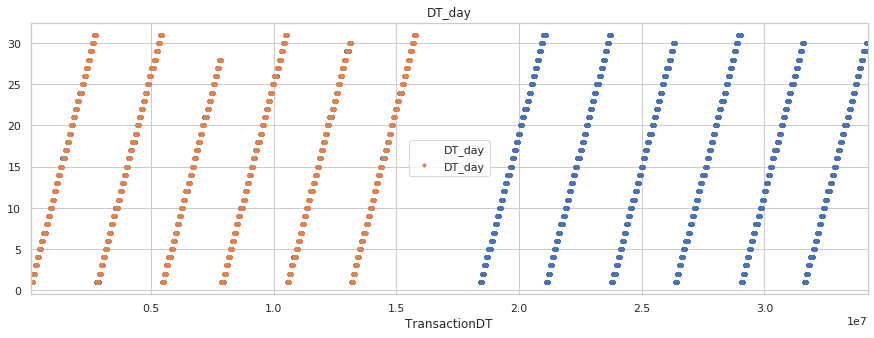

In [30]:
for feature in top5_feats:
    ax = tt[['TransactionDT',feature]].set_index('TransactionDT').plot(figsize=(15, 5), style='.', title=feature)
    tt.query('isFraud == 1')[['TransactionDT',feature]].set_index('TransactionDT').plot(figsize=(15, 5), style='.', ax=ax, label='Fraud')
    plt.show()

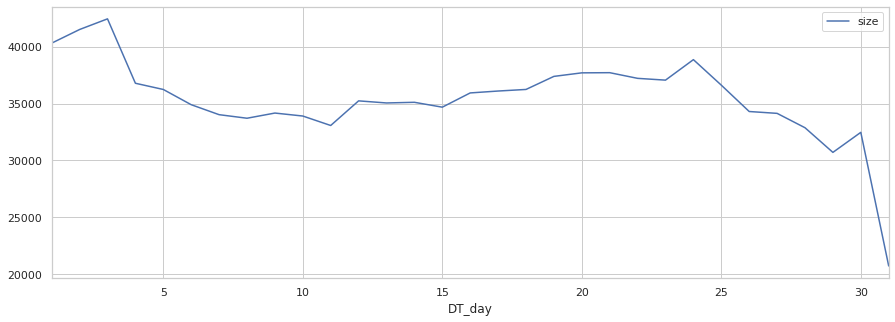

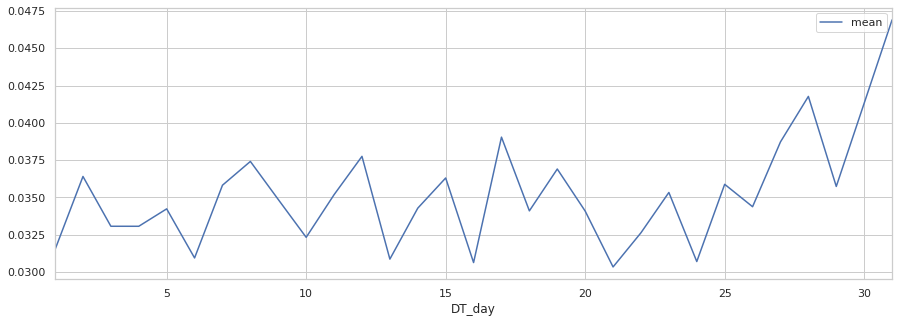

In [33]:
tt.groupby('DT_day')['isFraud'].agg(['size']).plot(figsize=(15, 5))
tt.groupby('DT_day')['isFraud'].agg(['mean']).plot(figsize=(15, 5))